# Part II - Ford GoBike Trip Duration per Datetime and User Type
## by Hind Khouya

## Investigation Overview

> The main reason of this investigation is to take a look at how the duration of trips changes with respect to DateTime and customer type. The focus was on hours of the day, days of the week and customer type.


## Dataset Overview

> The data consists of information regarding approximately 184,000 rides made in a bike-sharing system covering the greater San Francisco Bay area. The data features include duration (secs) and others such as DateTime, customer type, and gender, as well as additional variables such as member's year of birth, start and end station name, start and end station longitude and latitude, start and end station unique id among others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
GoBike =pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
GoBike.dropna(inplace=True)

GoBike['start_time'] = pd.to_datetime(GoBike['start_time'])
GoBike['end_time'] = pd.to_datetime(GoBike['end_time'])

GoBike['bike_id'] =GoBike.bike_id.astype(str)


import datetime as dt
GoBike['start_day'] = GoBike['start_time'].dt.day_name()
GoBike['start_month'] = GoBike['start_time'].dt.month_name()
# GoBike['start_year'] = GoBike['start_time'].dt.year
GoBike['start_hr'] = GoBike['start_time'].dt.hour
GoBike['start_hr'] = GoBike.start_hr.astype(str)




GoBike['end_day'] = GoBike['end_time'].dt.day_name()
GoBike['end_month'] = GoBike['end_time'].dt.month_name()
GoBike['end_hr'] = GoBike['end_time'].dt.hour
GoBike['end_hr'] = GoBike.end_hr.astype(str)

In [4]:
# convert day, and hour into ordered categorical types
ordinal_var_dict = {'start_day': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'],
                    'end_day': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'],
                   'start_hr': [str(i) for i in range(0,24)],
                   'end_hr': [str(i) for i in range(0,24)]}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    GoBike[var] = GoBike[var].astype(ordered_var)

## Distribution of Rides by User Type

Subscribers account for over 90% of the total rides

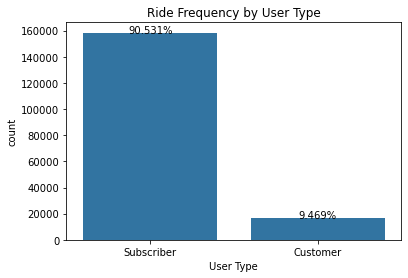

In [5]:
ax = sb.countplot(data = GoBike, x = 'user_type',  color=sb.color_palette()[0], order=GoBike.user_type.value_counts().index)

total = len(GoBike)
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+.05
    ax.annotate(percentage, (x, y),ha='center')
plt.xlabel('User Type')
plt.title('Ride Frequency by User Type');

## Distribution of Rides by Days

Most rides were taken on Thursdays and Tuesdays. Weekends have the lowest trip records.

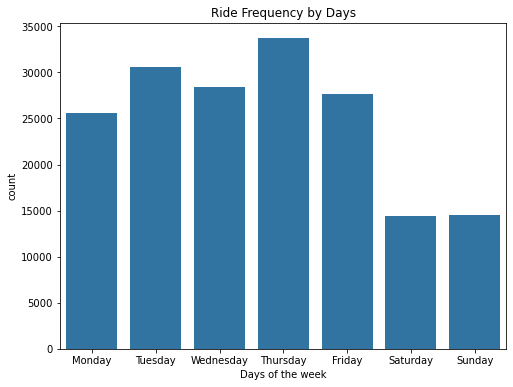

In [6]:
plt.figure(figsize = (8,6))
sb.countplot(data = GoBike, x = 'start_day', color = sb.color_palette()[0])
plt.xlabel('Days of the week')
plt.title('Ride Frequency by Days');

## Distribution of Rides by Hours


The higher ride frequencies for morning (8th and 9th hours) and evening (17th and 18th hours) can be linked to rush hours where people leave for work and come back later in the evening.


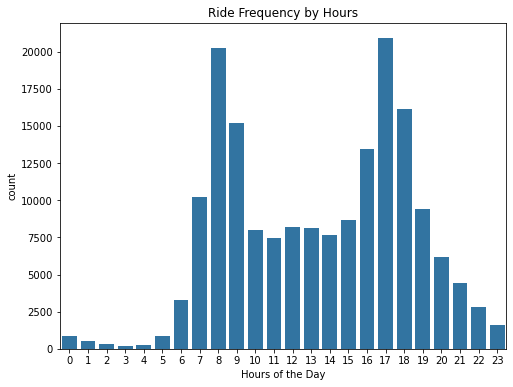

In [7]:
plt.figure(figsize = (8,6))
sb.countplot(data = GoBike, x = 'start_hr', color = sb.color_palette()[0])
plt.xlabel('Hours of the Day')
plt.title('Ride Frequency by Hours');

## Trip Duration across Customer Types

Customer user type trips take a longer duration than subscriber user type

<Figure size 432x432 with 0 Axes>

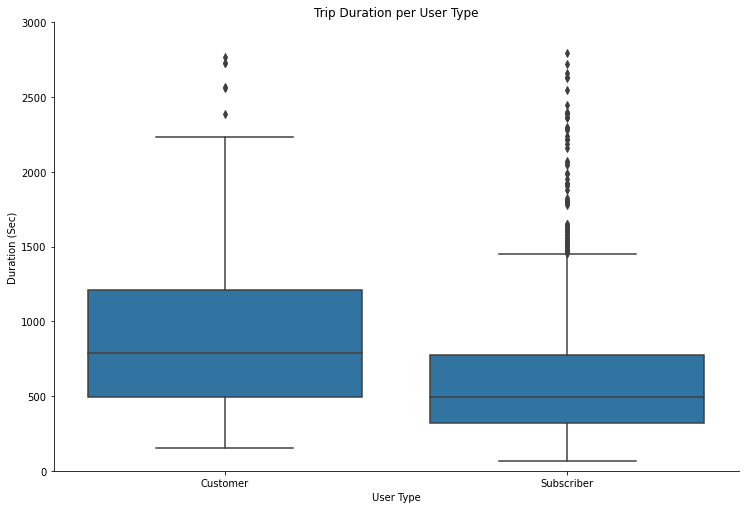

In [8]:
samples = np.random.choice(GoBike.shape[0], 2000, replace = False)
diamonds_samp = GoBike.iloc[samples,:]

plt.figure(figsize = [6, 6])
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

g = sb.PairGrid(data = diamonds_samp, y_vars = 'duration_sec', x_vars =  'user_type',
                size = 7, aspect = 1.5)
g.map(boxgrid)

plt.ylim([0,3000])
plt.xlabel('User Type')
plt.title('Trip Duration per User Type')
plt.ylabel('Duration (Sec)');

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [10]:
!jupyter nbconvert Part_II_Ford_GoBike.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_Ford_GoBike.ipynb to slides
[NbConvertApp] Writing 647493 bytes to Part_II_Ford_GoBike.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\user\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\user\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\user\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 